In [2]:
#IMPORT LIBRARY
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [3]:
#READ DATA
hd = pd.read_csv("https://raw.githubusercontent.com/stefkwan-h8/dataset/main/heart.csv")

In [4]:
#FIRST 5 ROWS DATA
hd.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# ***Attribute Information :***
 



```
        age
        sex
        chest pain type (4 values)
        resting blood pressure
        serum cholesterol in mg/dl
        fasting blood sugar > 120 mg/dl
        resting electrocardiographic results (values 0,1,2)
        maximum heart rate achieved
        exercise induced angina
        oldpeak = ST depression induced by exercise relative to rest
        the slope of the peak exercise ST segment
        number of major vessels (0-3) colored by flouroscopy
        thal: 3 = normal; 6 = fixed defect; 7 = reversible defect
```







In [5]:
#DATA EXPLORATION
hd.target.value_counts()

1    526
0    499
Name: target, dtype: int64

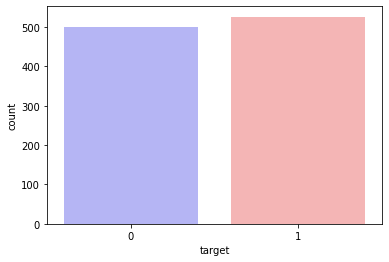

In [6]:
sns.countplot(x = "target", data = hd, palette = "bwr")
plt.show()

In [7]:
countSick = len(hd[hd.target == 0])
countHealthy = len(hd[hd.target == 1])

print("Persentase Pasien Yang Tidak Mempunyai Penyakit Jantung : {:.2f}%".format((countHealthy / (len(hd.target))*100)))
print("Persentase Pasien Yang Mempunyai Penyakit Jantung : {:.2f}%".format((countSick / (len(hd.target))*100)))


Persentase Pasien Yang Tidak Mempunyai Penyakit Jantung : 51.32%
Persentase Pasien Yang Mempunyai Penyakit Jantung : 48.68%


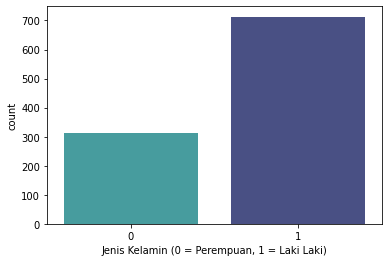

In [9]:
sns.countplot(x = 'sex', data = hd, palette = "mako_r")
plt.xlabel("Jenis Kelamin (0 = Perempuan, 1 = Laki Laki)")
plt.show()

In [10]:
countPerempuan = len(hd[hd.sex == 0])
countLakiLaki = len(hd[hd.sex == 1])

print("Persentase Pasien Perempuan : {:.2f}%".format((countPerempuan / (len(hd.sex)) * 100)))
print("Persentase Pasien Laki Laki : {:.2f}%".format((countLakiLaki / (len(hd.sex)) * 100)))

Persentase Pasien Perempuan : 30.44%
Persentase Pasien Laki Laki : 69.56%


In [13]:
hd.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


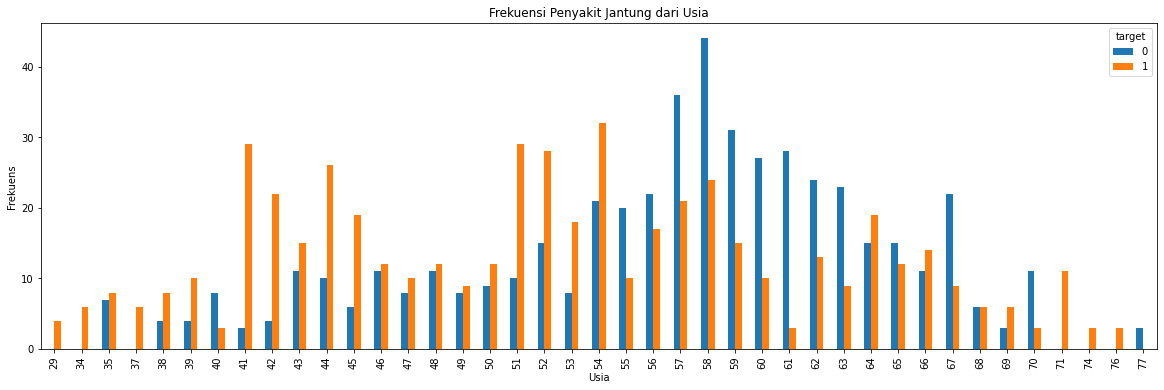

In [14]:
pd.crosstab(hd.age, hd.target).plot(kind = "bar", figsize = (20,6))
plt.title('Frekuensi Penyakit Jantung dari Usia')
plt.xlabel('Usia')
plt.ylabel('Frekuens')
plt.savefig('penyakitJantung&Umur.png')
plt.show()


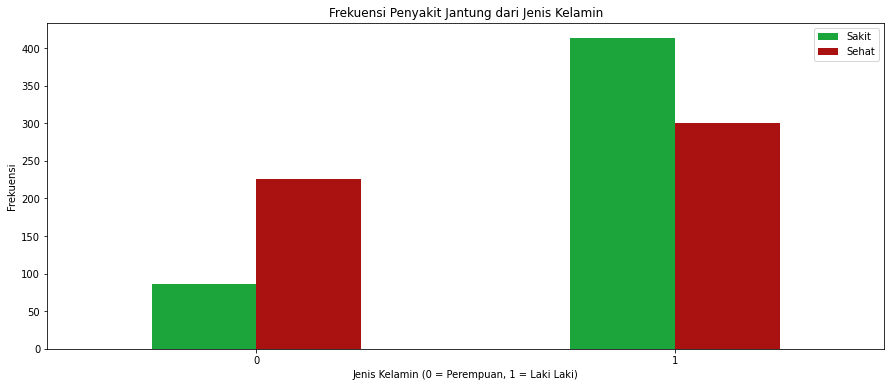

In [16]:
pd.crosstab(hd.sex, hd.target).plot(kind = "bar", figsize = (15,6), color = ['#1CA53B', '#AA1111'])
plt.title('Frekuensi Penyakit Jantung dari Jenis Kelamin')
plt.xlabel('Jenis Kelamin (0 = Perempuan, 1 = Laki Laki)')
plt.xticks(rotation = 0)
plt.legend(["Sakit", "Sehat"])
plt.ylabel('Frekuensi')
plt.show()

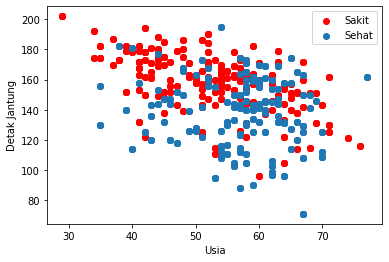

In [20]:
plt.scatter(x = hd.age[hd.target == 1], y = hd.thalach[(hd.target == 1)], c = "red")
plt.scatter(x = hd.age[hd.target == 0], y = hd.thalach[(hd.target == 0)])
plt.legend(["Sakit", "Sehat"])
plt.xlabel("Usia")
plt.ylabel("Detak Jantung")
plt.show()

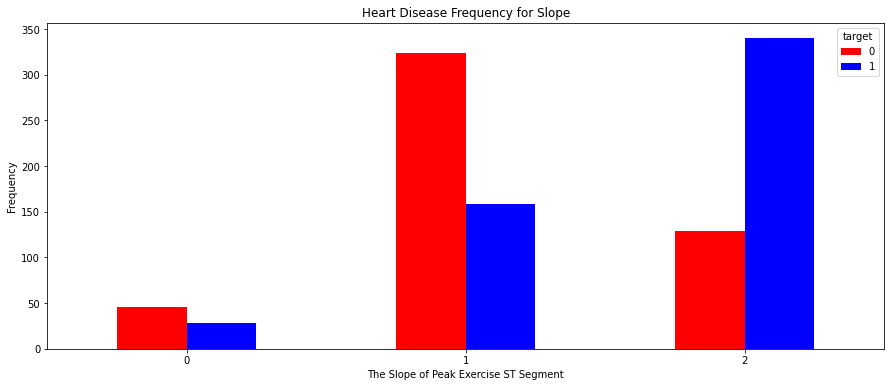

In [23]:
pd.crosstab(hd.slope, hd.target).plot(kind = "bar", figsize = (15,6), color =[
            '#FF0000', '#0000FF'
])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of Peak Exercise ST Segment')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

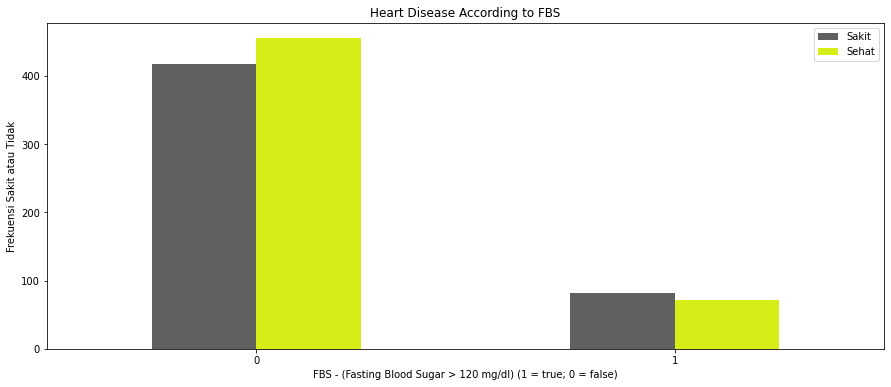

In [24]:
pd.crosstab(hd.fbs, hd.target).plot(kind = "bar", figsize = (15,6), 
                                    color = ['#606060FF', '#D6ED17FF'])
plt.title('Heart Disease According to FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Sakit", "Sehat"])
plt.ylabel('Frekuensi Sakit atau Tidak')
plt.show()

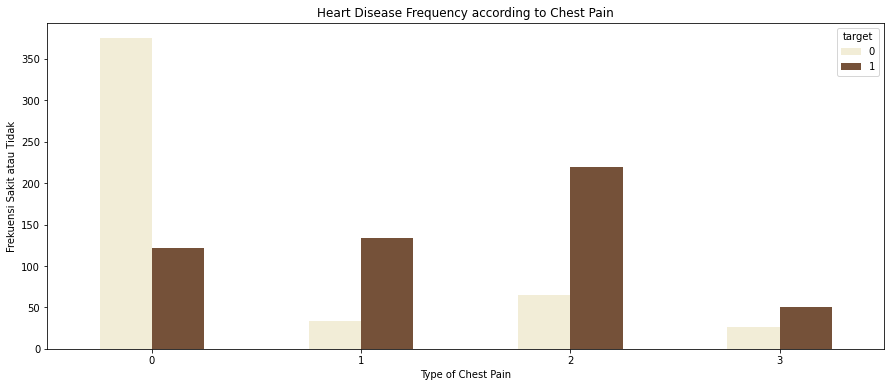

In [27]:
pd.crosstab(hd.cp, hd.target).plot(kind = "bar", figsize = (15,6), color=[
                                          '#F2EDD7FF', '#755139FF'
])
plt.title('Heart Disease Frequency according to Chest Pain')
plt.xlabel('Type of Chest Pain')
plt.xticks(rotation = 0)
plt.ylabel('Frekuensi Sakit atau Tidak')
plt.show()


#END OF DATA EXPLORATION

# ***Creating Dummy Variables***

```
cp
thal
slope
```



In [28]:
#KARENA 'cp', 'thal', 'slope' ADALAH KATEGORI VARIABLE MAKA SAYA AKAN MENJADIKAN MEREKA DUMMY VARIABLES.
a = pd.get_dummies(hd['cp'], prefix = "cp")
b = pd.get_dummies(hd['thal'], prefix = "thal")
c = pd.get_dummies(hd['slope'], prefix = "slope")

In [29]:
fr = [hd, a, b, c]
hd = pd.concat(fr, axis = 1)
hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,52,1,0,125,212,0,1,168,0,1.0,...,0,0,0,0,0,0,1,0,0,1
1,53,1,0,140,203,1,0,155,1,3.1,...,0,0,0,0,0,0,1,1,0,0
2,70,1,0,145,174,0,1,125,1,2.6,...,0,0,0,0,0,0,1,1,0,0
3,61,1,0,148,203,0,1,161,0,0.0,...,0,0,0,0,0,0,1,0,0,1
4,62,0,0,138,294,1,1,106,0,1.9,...,0,0,0,0,0,1,0,0,1,0


In [30]:
hd = hd.drop(columns = [
          'cp',
          'thal',
          'slope'
])
hd.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,52,1,125,212,0,1,168,0,1.0,2,...,0,0,0,0,0,0,1,0,0,1
1,53,1,140,203,1,0,155,1,3.1,0,...,0,0,0,0,0,0,1,1,0,0
2,70,1,145,174,0,1,125,1,2.6,0,...,0,0,0,0,0,0,1,1,0,0
3,61,1,148,203,0,1,161,0,0.0,1,...,0,0,0,0,0,0,1,0,0,1
4,62,0,138,294,1,1,106,0,1.9,3,...,0,0,0,0,0,1,0,0,1,0


# ***Membuat Model "Logistic Regression"***

Saya akan menggunakan sklearn library atau membuat function sendiri. 

In [34]:
y = hd.target.values
x_data = hd.drop(['target'], axis = 1)

In [37]:
#NORMALIZE DATA
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

In [38]:
#SPLIT DATA [80% = TRAIN DATA & 20% = TEST DATA]
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size = 0.2, random_state = 0
)

In [39]:
#TRANSPOSE MATRICES
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

In [40]:
#LETS SAY WEIGHT = 0.01 & BIAS = 0.0
#INITIALIZE
def initialize(dimension):
    weight = np.full((dimension, 1), 0.01)
    bias = 0.0
    return weight, bias

In [41]:
#SIGMOID FUNCTION
def sigmoid(z):
    y_head = 1/(1 + np.exp(-z))
    return y_head

In [51]:
#Forward and Backward Propagation

def forwardBackward(weight,bias,x_train,y_train):
    # FORWARD
    
    y_head = sigmoid(np.dot(weight.T,x_train) + bias)
    loss = -(y_train*np.log(y_head) + (1-y_train)*np.log(1-y_head))
    cost = np.sum(loss) / x_train.shape[1]
    
    # BACKWARD
    derivative_weight = np.dot(x_train,((y_head-y_train).T))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"Derivative Weight" : derivative_weight, "Derivative Bias" : derivative_bias}
    
    return cost,gradients



In [52]:
def update(weight,bias,x_train,y_train,learningRate,iteration) :
    costList = []
    index = []
    
    #for each iteration, update weight and bias values
    for i in range(iteration):
        cost,gradients = forwardBackward(weight,bias,x_train,y_train)
        weight = weight - learningRate * gradients["Derivative Weight"]
        bias = bias - learningRate * gradients["Derivative Bias"]
        
        costList.append(cost)
        index.append(i)

    parameters = {"weight": weight,"bias": bias}
    
    print("iteration:",iteration)
    print("cost:",cost)

    plt.plot(index,costList)
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()

    return parameters, gradients

In [53]:
def predict(weight,bias,x_test):
    z = np.dot(weight.T,x_test) + bias
    y_head = sigmoid(z)

    y_prediction = np.zeros((1,x_test.shape[1]))
    
    for i in range(y_head.shape[1]):
        if y_head[0,i] <= 0.5:
            y_prediction[0,i] = 0
        else:
            y_prediction[0,i] = 1
    return y_prediction

In [54]:
def logistic_regression(x_train,y_train,x_test,y_test,learningRate,iteration):
    dimension = x_train.shape[0]
    weight,bias = initialize(dimension)
    
    parameters, gradients = update(weight,bias,x_train,y_train,learningRate,iteration)

    y_prediction = predict(parameters["weight"],parameters["bias"],x_test)
    
    print("Manuel Test Accuracy: {:.2f}%".format((100 - np.mean(np.abs(y_prediction - y_test))*100)))



iteration: 100
cost: 0.37214880873836975


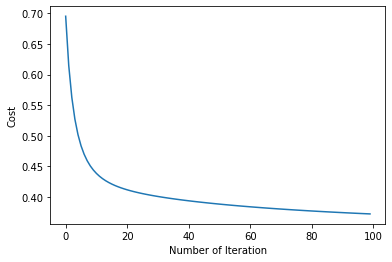

Manuel Test Accuracy: 86.34%


In [55]:
logistic_regression(x_train,y_train,x_test,y_test,1,100)

In [87]:
#FIND OUT SKLEARN'S SCORE
accuracies = {}

lr = LogisticRegression()
lr.fit(x_train.T,y_train.T)
acc = lr.score(x_test.T,y_test.T)*100

accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))

#END OF LOGISTIC REGRESSION

Test Accuracy 85.85%


# ***K NEARES NEIGHBOUR CLASSIFICATION [KNN]***

In [88]:
#SCORE USING KKN ALGORITHM
#KNN Model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(x_train.T, y_train.T)
prediction = knn.predict(x_test.T)

print("{} NN Score: {:.2f}%".format(2, knn.score(x_test.T, y_test.T) * 100))

2 NN Score: 100.00%


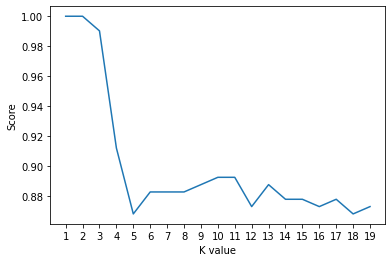

Maximum KNN Score is 100.00%


In [89]:
#TRY TO FIND K VALUE
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(x_train.T, y_train.T)
    scoreList.append(knn2.score(x_test.T, y_test.T))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)*100
accuracies['KNN'] = acc
print("Maximum KNN Score is {:.2f}%".format(acc))

# ***SUPPORT VECTOR MACHINE ALGORITHM [SVM]***

In [81]:
from sklearn.svm import SVC

In [92]:
svm = SVC(random_state = 1)
svm.fit(x_train.T, y_train.T)

acc = svm.score(x_test.T,y_test.T) * 100
accuracies['SVM'] = acc
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))

Test Accuracy of SVM Algorithm: 91.71%


# ***DECISION TREE ALGORITHM***

In [94]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train.T, y_train.T)

acc = dtc.score(x_test.T, y_test.T)*100
accuracies['Decision Tree'] = acc
print("Decision Tree Test Accuracy {:.2f}%".format(acc))

Decision Tree Test Accuracy 100.00%


# ***RANDOM FOREST CLASSIFICATION***

In [96]:
# RANDOM FOREST CLASSIFICATION
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(x_train.T, y_train.T)

acc = rf.score(x_test.T, y_test.T) * 100
accuracies['Random Forest'] = acc

print ("Random Forest Algorithm Accuracy : {:.2f}%".format(acc))

Random Forest Algorithm Accuracy : 100.00%


# ***NAIVE BAYES ALGORITHM***

In [97]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train.T, y_train.T)

acc = nb.score(x_test.T,y_test.T)*100
accuracies['Naive Bayes'] = acc
print("Accuracy of Naive Bayes: {:.2f}%".format(acc))

Accuracy of Naive Bayes: 88.29%


# ***COMPARING MODELS***

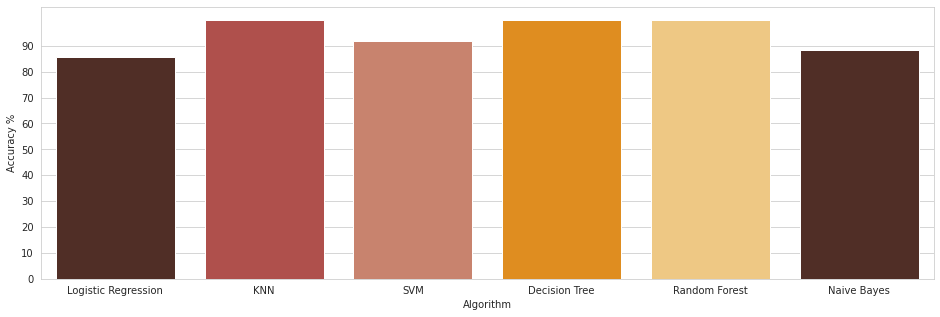

In [99]:
colors = [
          '#57291F',
          '#C0413B',
          '#D77B5F',
          '#FF9200',
          '#FFCD73'
]

sns.set_style("whitegrid")
plt.figure(figsize = (16, 5))
plt.yticks(np.arange(0, 100, 10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithm")
sns.barplot(x = list(accuracies.keys()), y = list(accuracies.values()), palette = colors)
plt.show()

# ***CONFUSION MATRIX***

In [100]:
#PREDICTED VALUES
y_head_lr = lr.predict(x_test.T)
knn3 = KNeighborsClassifier(n_neighbors = 3)
knn3.fit(x_train.T, y_train.T)
y_head_knn = knn3.predict(x_test.T)
y_head_svm = svm.predict(x_test.T)
y_head_nb = nb.predict(x_test.T)
y_head_dtc = dtc.predict(x_test.T)
y_head_rf = rf.predict(x_test.T)

In [103]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test, y_head_lr)
cm_knn = confusion_matrix(y_test, y_head_knn)
cm_svm = confusion_matrix(y_test,y_head_svm)
cm_nb = confusion_matrix(y_test, y_head_nb)
cm_dtc = confusion_matrix(y_test, y_head_dtc)
cm_rf = confusion_matrix(y_test, y_head_rf)

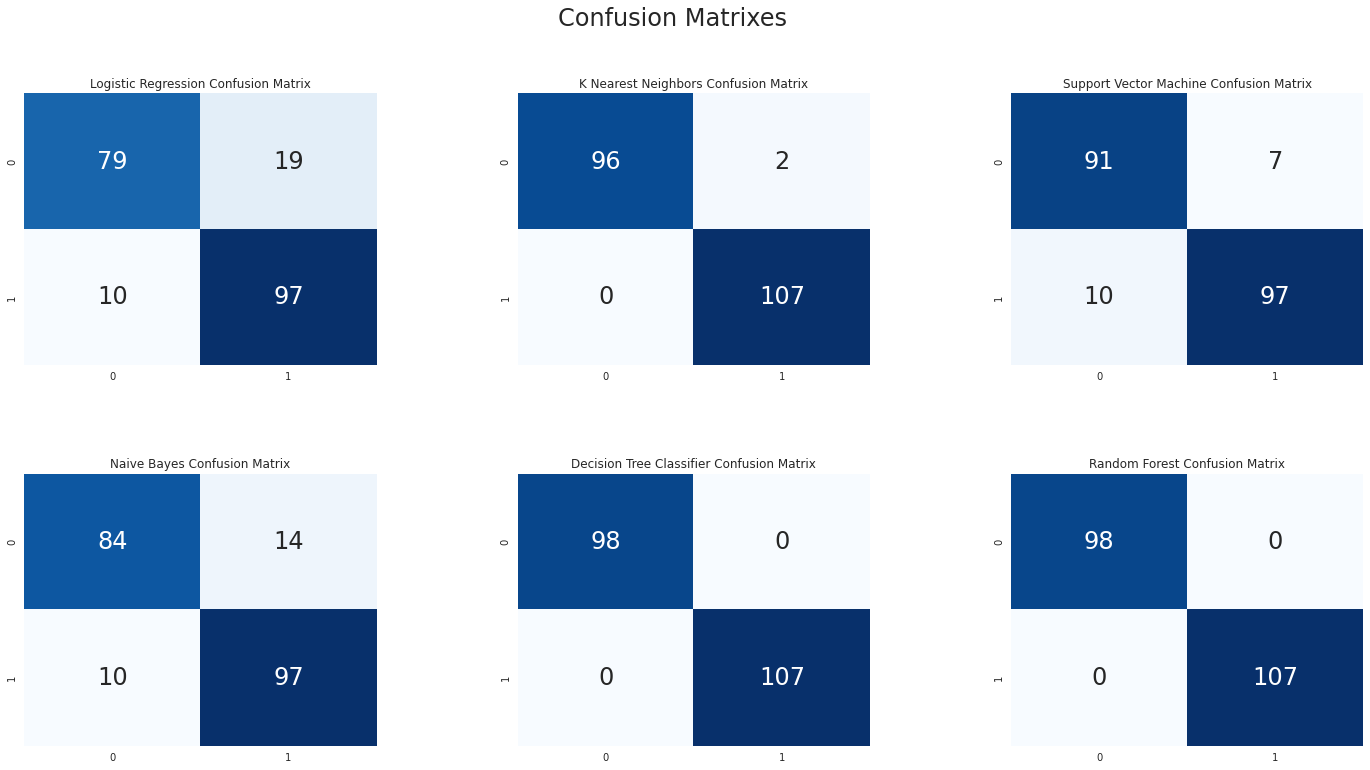

In [104]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,6)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()